# Customer Churn Prediction: Model Training and Evaluation

In [4]:
import platform
print(platform.architecture())

('64bit', 'Mach-O')


In [10]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip uninstall xgboost --yes

Found existing installation: xgboost 2.1.4
Uninstalling xgboost-2.1.4:
  Successfully uninstalled xgboost-2.1.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

  Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 34.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 235.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the preprocessed dataset
processed_path = "../data/processed/telco_churn_processed.csv"
df = pd.read_csv(processed_path)
print(f"Loaded processed dataset with {df.shape[0]} rows and {df.shape[1]} columns")


Loaded processed dataset with 7043 rows and 39 columns


## 1. Split into features and target

In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Churn rate in dataset: {y.mean():.2%}")

Features shape: (7043, 38)
Target shape: (7043,)
Churn rate in dataset: 26.54%


In [8]:
# 2. Train-Test Split
# ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Churn rate in training set: {y_train.mean():.2%}")
print(f"Churn rate in testing set: {y_test.mean():.2%}")

Training set shape: (5282, 38)
Testing set shape: (1761, 38)
Churn rate in training set: 26.54%
Churn rate in testing set: 26.52%


## 3. Train and Evaluate Multiple Models

In [22]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Store results
results = []
y_pred_dict = {}
y_proba_dict = {}

In [23]:
print("\nTraining and evaluating models...")
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Store predictions
    y_pred_dict[name] = y_pred
    y_proba_dict[name] = y_pred_proba
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Training Time (s)': train_time
    })
    
    # Print model performance
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Training Time: {train_time:.2f} seconds")
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(f"TN: {cm[0,0]}, FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]}, TP: {cm[1,1]}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Training and evaluating models...

Evaluating Logistic Regression...
Accuracy: 0.7978
Precision: 0.6504
Recall: 0.5139
F1 Score: 0.5742
ROC AUC: 0.8433
Training Time: 0.05 seconds

Confusion Matrix:
TN: 1165, FP: 129
FN: 227, TP: 240

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.65      0.51      0.57       467

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761


Evaluating Decision Tree...
Accuracy: 0.7263
Precision: 0.4847
Recall: 0.5075
F1 Score: 0.4958
ROC AUC: 0.6564
Training Time: 0.03 seconds

Confusion Matrix:
TN: 1042, FP: 252
FN: 230, TP: 237

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1294
           1       0.48      0.51      0.50       467

    accuracy                    

## 4. Compare Model Results


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC,Training Time (s)
Model,,,,,,
Logistic Regression,0.797842,0.650407,0.513919,0.574163,0.843261,0.048144
Decision Tree,0.726292,0.484663,0.507495,0.495816,0.656381,0.031332
Random Forest,0.785917,0.629310,0.468951,0.537423,0.828579,0.426871
Gradient Boosting,0.794435,0.652174,0.481799,0.554187,0.843914,0.855897
XGBoost,0.778535,0.604336,0.477516,0.533493,0.818032,0.209972


<Figure size 2000x1000 with 0 Axes>

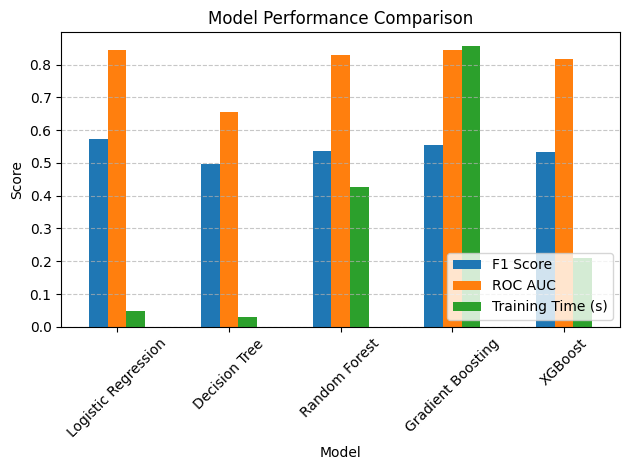

In [24]:
# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

# Display results table
print("\nModel Performance Comparison:")
display(results_df)

# Visualize model comparison
plt.figure(figsize=(20, 10))
results_df[['F1 Score', 'ROC AUC', 'Training Time (s)']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 5. ROC Curve Comparison

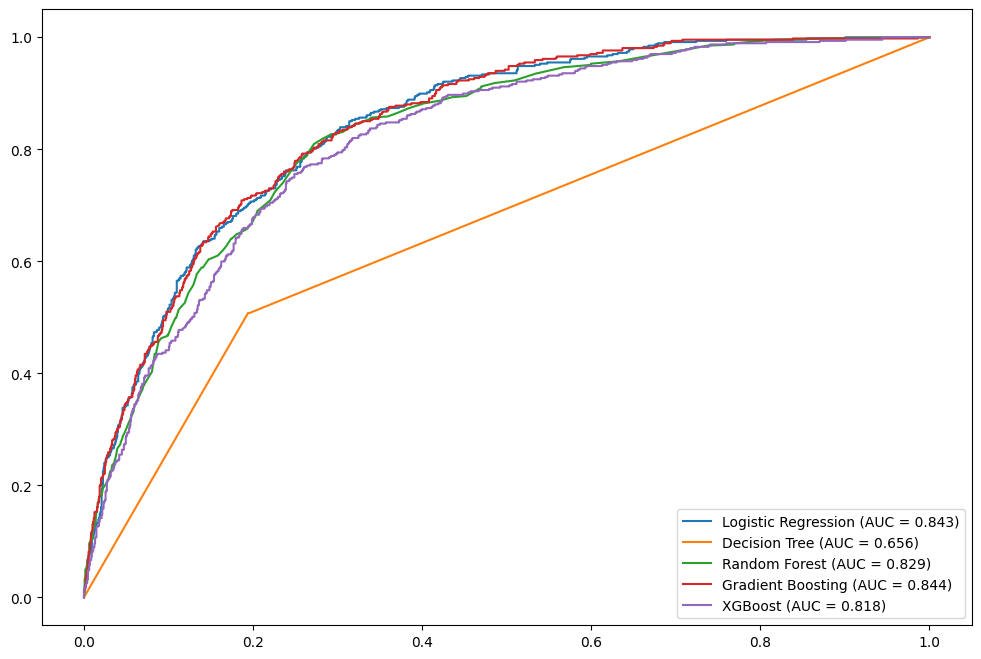

In [25]:
plt.figure(figsize=(12, 8))
for name, y_proba in y_proba_dict.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
    plt.legend(loc='lower right')

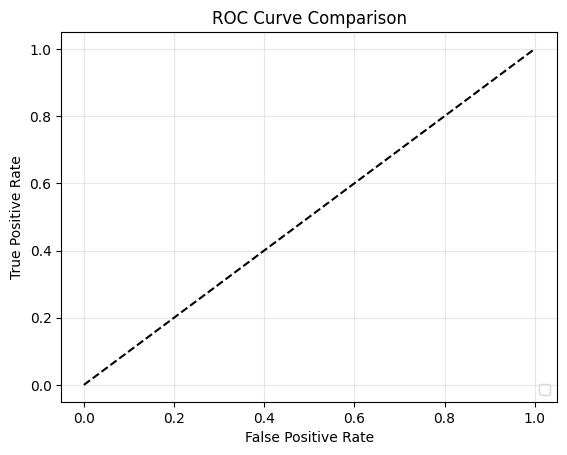

In [26]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# 6. Select Best Model based on AUC Score

In [29]:
best_model_name = results_df['ROC AUC'].idxmax()
best_model = models[best_model_name]
print(f"\nBest performing model based on AUC score: {best_model_name}")
print(results_df.loc[best_model_name])


Best performing model based on AUC score: Gradient Boosting
Accuracy             0.794435
Precision            0.652174
Recall               0.481799
F1 Score             0.554187
ROC AUC              0.843914
Training Time (s)    0.855897
Name: Gradient Boosting, dtype: float64


In [28]:
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest performing model based on F1 score: {best_model_name}")
print(results_df.loc[best_model_name])


Best performing model based on F1 score: Logistic Regression
Accuracy             0.797842
Precision            0.650407
Recall               0.513919
F1 Score             0.574163
ROC AUC              0.843261
Training Time (s)    0.048144
Name: Logistic Regression, dtype: float64


Gradient Boosting seems to be the most effective model in terms of AUC score, while logistic regression seems the most effective in terms of F1 score when comparing models without hyperparameter tuning. I will attempt tuning on xgboost. First let's see feature importances.

## 7. Feauture Importance Analysis

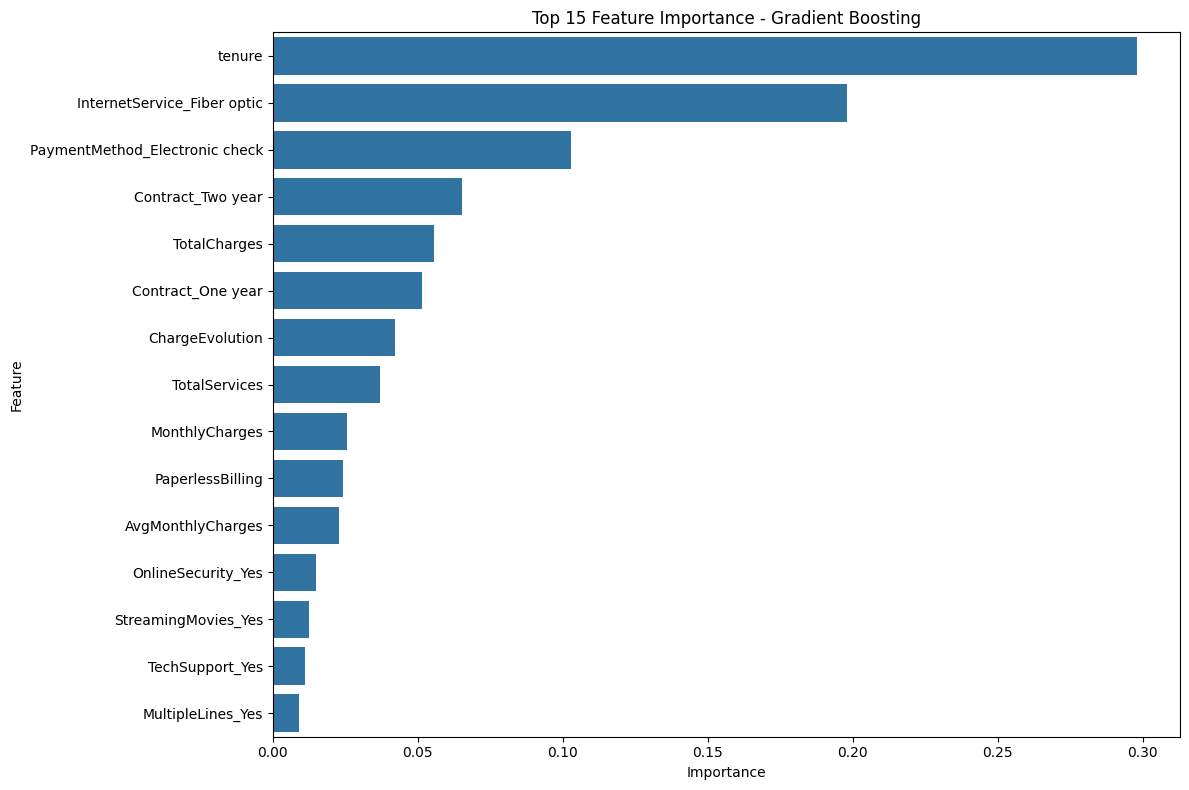


Top 10 most important features:
                           Feature  Importance
3                           tenure    0.297969
14     InternetService_Fiber optic    0.198071
31  PaymentMethod_Electronic check    0.102809
29               Contract_Two year    0.065151
7                     TotalCharges    0.055693
28               Contract_One year    0.051304
10                 ChargeEvolution    0.042302
8                    TotalServices    0.036870
6                   MonthlyCharges    0.025633
5                 PaperlessBilling    0.024336


In [30]:
# Get feature importance
feature_importance = best_model.feature_importances_

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Visualize top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title(f'Top 15 Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

print("\nTop 10 most important features:")
print(importance_df.head(10))



As expected, tenure remains the most important predictor. Having fiber optic also seems very important as we saw on the first notebook. Interestingly, whether someone is paying with electronic check or not also seems to affect the predictions.

## 8. Hyperparameter Tuning for XGBoost Model

In [54]:
# Define parameter grid based on the best model
param_grid = {}

model_to_tune_name = 'XGBoost'
model_to_tune = models['XGBoost']

if model_to_tune_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.2, 0.5],
        'max_depth': [3, 5],
        'gamma': [0, 0.2],
        'subsample': [0.8, 1.0],
        'reg_alpha': [0.0, 1.0],
        'reg_lambda': [0.1, 0]
    }

In [55]:
# Create grid search with cross-validation with f1 score as the target metric
if param_grid:
    grid_search = GridSearchCV(
        model_to_tune, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    # Get best parameters
    best_params = grid_search.best_params_
    print(f"\nBest parameters: {best_params}")
    
    # Get best estimator
    best_estimator = grid_search.best_estimator_
    # Evaluate best model
    y_pred_best = best_estimator.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_best)
    precision = precision_score(y_test, y_pred_best)
    recall = recall_score(y_test, y_pred_best)
    f1 = f1_score(y_test, y_pred_best)
    auc = roc_auc_score(y_test, y_pred_best)
    
    print("\nTuned Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    
    # Calculate improvement
    baseline_f1 = results_df.loc[model_to_tune_name, 'F1 Score']
    improvement = (f1 - baseline_f1) / baseline_f1 * 100
    print(f"\nImprovement in F1 Score: {improvement:.2f}%")
    

Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Best parameters: {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 1.0, 'reg_lambda': 0, 'subsample': 0.8}

Tuned Model Performance:
Accuracy: 0.8052
Precision: 0.6761
Recall: 0.5096
F1 Score: 0.5812
ROC AUC: 0.7108

Improvement in F1 Score: 8.94%


We got an ~9% improvement however we are still on the low end of what we would expect

In [56]:
# Check class distribution
print(f"Class distribution: {y.value_counts(normalize=True)}")

# Apply class weights
xgb_model = XGBClassifier(
    scale_pos_weight=len(y[y==0])/len(y[y==1]),  # Automatically weight classes
    random_state=42,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=50,
    subsample=0.8,
    gamma = 0.2,
    reg_alpha = 1.0,
    reg_lambda = 0
)

Class distribution: Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [57]:
#fit the best model with class weights
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print model performance
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

F1 Score: 0.6274
ROC AUC: 0.8425


This clearly helped improving our performance!

In [60]:
# Get feature importance
feature_importance = xgb_model.feature_importances_

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values('Importance', ascending=False)

## 9. Insights

In [67]:
# Get top features if available
if 'importance_df' in locals():
    print("\nTop churn factors:")
    for i, (feature, importance) in enumerate(zip(importance_df['Feature'].head(6), importance_df['Importance'].head(6))):
        print(f"{i+1}. {feature}: {importance:.3f}")


Top churn factors:
1. Contract_One year: 0.310
2. Contract_Two year: 0.189
3. InternetService_Fiber optic: 0.095
4. InternetService_No: 0.067
5. PaymentMethod_Electronic check: 0.046
6. tenure: 0.045


Interestingly, on our tuned model tenure is not the most important factor, however it's still on top-6

In [68]:
# Compute the financial impact of churn
if 'MonthlyCharges' in df.columns:
    avg_monthly_charge = df['MonthlyCharges'].mean()
    total_customers = len(df)
    churn_rate = df['Churn'].mean()
    monthly_revenue_loss = avg_monthly_charge * total_customers * churn_rate
    
    print(f"\nFinancial Impact:")
    print(f"Average Monthly Charge: ${avg_monthly_charge:.2f}")
    print(f"Current Churn Rate: {churn_rate:.2%}")
    print(f"Estimated Monthly Revenue Loss: ${monthly_revenue_loss:.2f}")
    
    # Estimated churn reduction with intervention
    estimated_reduction = 0.10  # Assume 10% reduction
    new_churn_rate = churn_rate * (1 - estimated_reduction)
    new_monthly_revenue_loss = avg_monthly_charge * total_customers * new_churn_rate
    savings = monthly_revenue_loss - new_monthly_revenue_loss
    
    print(f"\nIf churn is reduced by {estimated_reduction:.0%} through targeted interventions:")
    print(f"New Churn Rate: {new_churn_rate:.2%}")
    print(f"New Estimated Monthly Revenue Loss: ${new_monthly_revenue_loss:.2f}")
    print(f"Monthly Savings: ${savings:.2f}")
    print(f"Annual Savings: ${savings * 12:.2f}")



Financial Impact:
Average Monthly Charge: $64.76
Current Churn Rate: 26.54%
Estimated Monthly Revenue Loss: $121039.60

If churn is reduced by 10% through targeted interventions:
New Churn Rate: 23.88%
New Estimated Monthly Revenue Loss: $108935.64
Monthly Savings: $12103.96
Annual Savings: $145247.52


In [73]:
# Plot the gain and lift charts

def plot_gain_lift(y_true, y_proba, n_points=10):

    # Convert inputs to numpy arrays if they're pandas Series
    y_true_np = np.array(y_true)
    y_proba_np = np.array(y_proba)
    
    # Sort by descending probability
    sorted_indices = np.argsort(y_proba_np)[::-1]
    y_true_sorted = y_true_np[sorted_indices]
    
    # Calculate cumulative gains
    gains = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    # Create percentile points
    percentiles = np.linspace(0, 1, len(y_true_sorted))
    
    # For lift, we compare to random baseline
    lift = gains / percentiles
    lift[0] = lift[1]  # Fix division by zero
    
    # Reduce to n_points for cleaner visualization
    if n_points < len(percentiles):
        step = len(percentiles) // n_points
        percentiles_reduced = percentiles[::step]
        gains_reduced = gains[::step]
        lift_reduced = lift[::step]
        

        if len(percentiles_reduced) < n_points or percentiles_reduced[-1] < 1.0:
            percentiles_reduced = np.append(percentiles_reduced, 1.0)
            gains_reduced = np.append(gains_reduced, 1.0)
            lift_reduced = np.append(lift_reduced, 1.0)
    else:
        percentiles_reduced = percentiles
        gains_reduced = gains
        lift_reduced = lift
    
    # Calculate AUC for both charts
    gain_auc = auc(percentiles_reduced, gains_reduced)
    lift_auc = auc(percentiles_reduced, lift_reduced)
    
    # Create the plots
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    
    # Gain chart (Cumulative)
    ax[0].plot(percentiles_reduced, gains_reduced, 'b-', label=f'Model (AUC = {gain_auc:.3f})')
    ax[0].plot([0, 1], [0, 1], 'r--', label='Random')
    ax[0].set_title('Cumulative Gain Chart')
    ax[0].set_xlabel('Percentage of sample (ordered by predicted probability)')
    ax[0].set_ylabel('Percentage of actual positives captured')
    ax[0].grid(True)
    ax[0].legend()
    
    # Lift chart
    ax[1].plot(percentiles_reduced, lift_reduced, 'g-', label=f'Model (AUC = {lift_auc:.3f})')
    ax[1].plot([0, 1], [1, 1], 'r--', label='Random')
    ax[1].set_title('Lift Chart')
    ax[1].set_xlabel('Percentage of sample (ordered by predicted probability)')
    ax[1].set_ylabel('Lift (ratio of gain to random)')
    ax[1].grid(True)
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Also print metrics for top deciles
    decile_size = len(y_true_np) // 10
    print("\nLift and Gain Metrics by Decile:")
    print("\n")
    print("Decile | % of Data | % of Positives | Lift")
    print("\n")
    
    for i in range(10):
        start_idx = i * decile_size
        end_idx = min((i + 1) * decile_size, len(y_true_np))
        
        if i == 9:  # Last decile might have extra elements
            end_idx = len(y_true_np)
        
        decile_size_actual = end_idx - start_idx
        decile_percent = decile_size_actual / len(y_true_np) * 100
        
        decile_indices = sorted_indices[start_idx:end_idx]
        decile_positives = y_true_np[decile_indices].sum()
        decile_positive_rate = decile_positives / decile_size_actual
        
        overall_positive_rate = y_true_np.mean()
        decile_lift = decile_positive_rate / overall_positive_rate
        
        print(f"{i+1:2d}     | {decile_percent:6.1f}%  | {decile_positive_rate*100:7.1f}%     | {decile_lift:4.2f}x")
    
    # Print the overall lift for top X% of customers
    print("\nCumulative Lift for Top X% of Customers:")
    print("\n")

    print("Top %  | % of Positives | Lift")
    print("\n")
    
    for pct in [10, 20, 30, 50]:
        cutoff_idx = int(len(y_true_np) * pct / 100)
        top_indices = sorted_indices[:cutoff_idx]
        
        top_positives = y_true_np[top_indices].sum()
        top_positive_rate = top_positives / np.sum(y_true_np)
        
        random_rate = pct / 100
        cumulative_lift = top_positive_rate / random_rate
        
        print(f"{pct:3d}%   | {top_positive_rate*100:7.1f}%     | {cumulative_lift:4.2f}x")


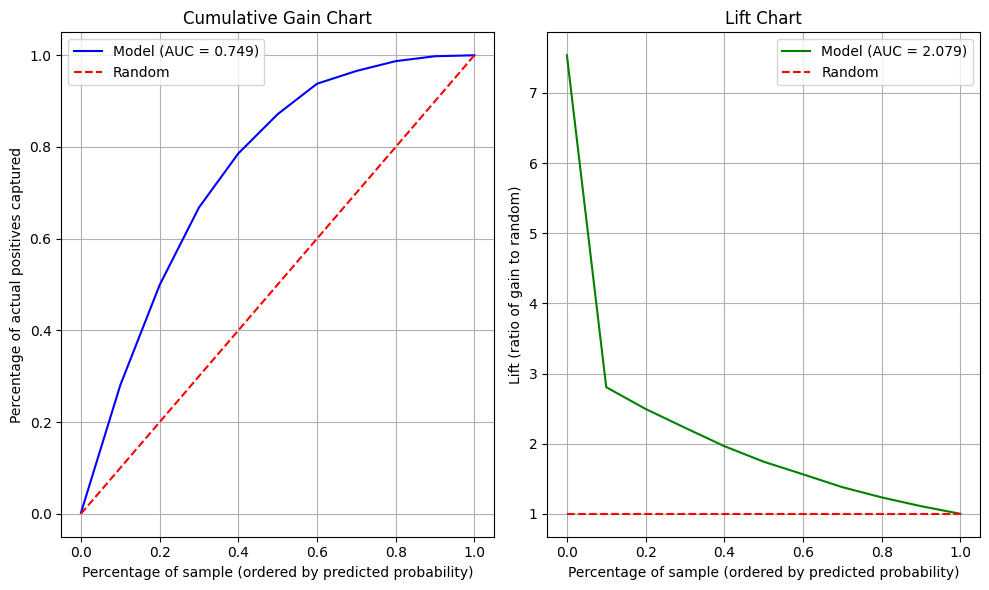


Lift and Gain Metrics by Decile:


Decile | % of Data | % of Positives | Lift


 1     |   10.0%  |    74.4%     | 2.81x
 2     |   10.0%  |    58.0%     | 2.19x
 3     |   10.0%  |    44.9%     | 1.69x
 4     |   10.0%  |    30.7%     | 1.16x
 5     |   10.0%  |    23.3%     | 0.88x
 6     |   10.0%  |    17.6%     | 0.66x
 7     |   10.0%  |     7.4%     | 0.28x
 8     |   10.0%  |     5.7%     | 0.21x
 9     |   10.0%  |     2.8%     | 0.11x
10     |   10.1%  |     0.6%     | 0.02x

Cumulative Lift for Top X% of Customers:


Top %  | % of Positives | Lift


 10%   |    28.1%     | 2.81x
 20%   |    49.9%     | 2.49x
 30%   |    66.8%     | 2.23x
 50%   |    87.2%     | 1.74x


In [74]:
plot_gain_lift(y_test, xgb_model.predict_proba(X_test)[:, 1])